# Prática de Teorema de Naive Bayes

## Mushroom Dataset

### Download Dataset

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/mushroom-classification")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\SBUtilizador\.cache\kagglehub\datasets\uciml\mushroom-classification\versions\1


### Importar Dataset

In [2]:
import pandas as pd

dataset_mushroom = pd.read_csv('mushrooms.csv', sep=',', header=None, names=['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'])
dataset_mushroom = dataset_mushroom.iloc[1:]

### Visualizar dimensão e primeiras 5 linhas do Dataset

In [25]:
print(dataset_mushroom.shape)
dataset_mushroom.head()

(8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
2,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
3,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
4,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
5,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Verificar se não existem valores nulos por coluna

In [26]:
dataset_mushroom.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### Verificar quantos valores diferentes tem cada coluna

In [27]:
dataset_mushroom.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

### Separar dataset em X e Y

In [7]:
x_mushroom = dataset_mushroom.iloc[:, 1:]
y_mushroom = dataset_mushroom.iloc[:, 0]

print(x_mushroom)
print(y_mushroom)

     cap-shape cap-surface cap-color bruises odor gill-attachment  \
1            x           s         n       t    p               f   
2            x           s         y       t    a               f   
3            b           s         w       t    l               f   
4            x           y         w       t    p               f   
5            x           s         g       f    n               f   
...        ...         ...       ...     ...  ...             ...   
8120         k           s         n       f    n               a   
8121         x           s         n       f    n               a   
8122         f           s         n       f    n               a   
8123         k           y         n       f    y               f   
8124         x           s         n       f    n               a   

     gill-spacing gill-size gill-color stalk-shape  ...  \
1               c         n          k           e  ...   
2               c         b          k           e  .

### Codificar as features e o target

In [8]:
from sklearn.preprocessing import LabelEncoder

le_mushroom = LabelEncoder()
x_mushroom_encoded = x_mushroom.apply(le_mushroom.fit_transform)
y_mushroom_encoded = le_mushroom.fit_transform(y_mushroom)

print(x_mushroom_encoded)
print(y_mushroom_encoded)

      cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
1             5            2          4        1     6                1   
2             5            2          9        1     0                1   
3             0            2          8        1     3                1   
4             5            3          8        1     6                1   
5             5            2          3        0     5                1   
...         ...          ...        ...      ...   ...              ...   
8120          3            2          4        0     5                0   
8121          5            2          4        0     5                0   
8122          2            2          4        0     5                0   
8123          3            3          4        0     8                1   
8124          5            2          4        0     5                0   

      gill-spacing  gill-size  gill-color  stalk-shape  ...  \
1                0          1       

In [10]:
print(x_mushroom_encoded.describe().applymap('{:}'.format).T)

                           count                 mean                  std  \
cap-shape                 8124.0    3.348104382077794   1.6043290877115428   
cap-surface               8124.0     1.82767109798129   1.2298725242272937   
cap-color                 8124.0    4.504677498769079       2.545820941521   
bruises                   8124.0   0.4155588380108321   0.4928484444287059   
odor                      8124.0    4.144756277695716   2.1037290837439513   
gill-attachment           8124.0   0.9741506646971935  0.15869545408862348   
gill-spacing              8124.0  0.16149679960610536     0.36801121444867   
gill-size                 8124.0  0.30920728705071393   0.4621952359773051   
gill-color                8124.0     4.81068439192516   3.5403589714225214   
stalk-shape               8124.0   0.5672082717872969  0.49549295549034134   
stalk-root                8124.0   1.1097981290004924   1.0611060679879225   
stalk-surface-above-ring  8124.0   1.5750861644510095   0.621459

C:\Users\SBUtilizador\AppData\Local\Temp\ipykernel_2644\1705020667.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(x_mushroom_encoded.describe().applymap('{:}'.format).T)


### Dividir Dataset em Treino e Teste

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_mushroom_encoded, y_mushroom_encoded, test_size=0.33, random_state=42)

### Treinar Dataset, fazer previsões e calcular $R^2$ utilizado os vários modelos de Naive Bayes

#### MultinomialNB

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

MultiNB = MultinomialNB()
MultiNB.fit(x_train, y_train)

y_predict_Multi = MultiNB.predict(x_test)

##### Accuracy

In [32]:
accuracy_Multi = accuracy_score(y_test, y_predict_Multi)
print("Accuracy:", accuracy_Multi)

Accuracy: 0.8008205893323387


##### Matriz Confusão

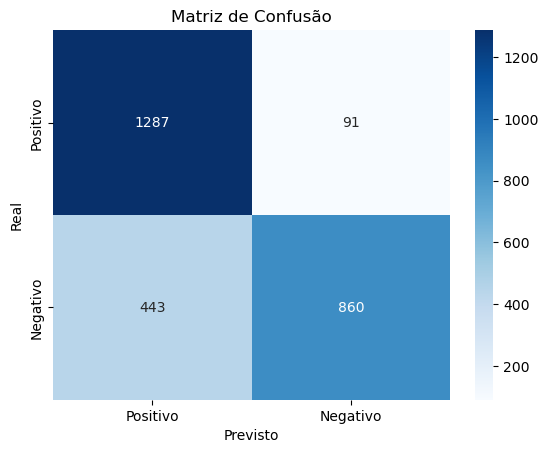

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_predict_Multi)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Positivo", "Negativo"], yticklabels=["Positivo", "Negativo"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

#### GaussianNB

In [34]:
from sklearn.naive_bayes import GaussianNB

gNB = GaussianNB()
gNB.fit(x_train, y_train)

y_predict_Gauss = gNB.predict(x_test)

##### Accuracy

In [35]:
accuracy_Gauss = accuracy_score(y_test, y_predict_Gauss)
print("Accuracy:", accuracy_Gauss)

Accuracy: 0.9261469600895188


##### Matriz Confusão

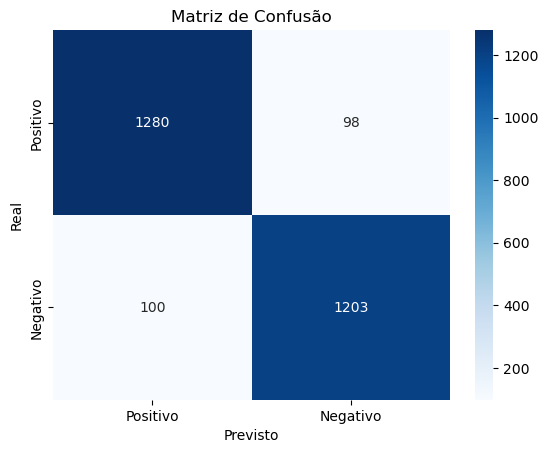

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_predict_Gauss)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Positivo", "Negativo"], yticklabels=["Positivo", "Negativo"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

#### ComplementNB

In [37]:
from sklearn.naive_bayes import ComplementNB

cNB = ComplementNB()
cNB.fit(x_train, y_train)

y_predict_Complem = cNB.predict(x_test)

##### Accuracy

In [38]:
accuracy_Complem = accuracy_score(y_test, y_predict_Complem)
print("Accuracy:", accuracy_Complem)

Accuracy: 0.8049235359940321


##### Matriz Confusão

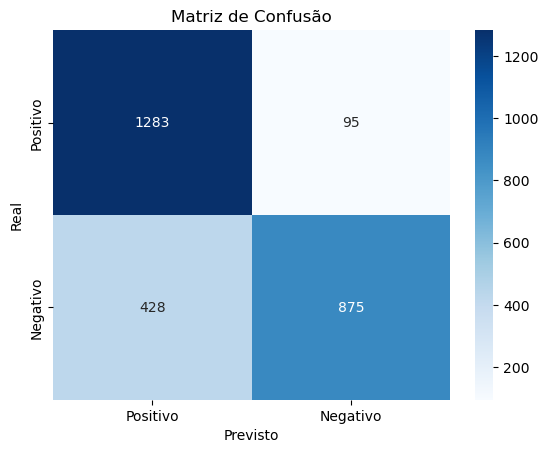

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_predict_Complem)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Positivo", "Negativo"], yticklabels=["Positivo", "Negativo"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

#### BernoulliNB

In [40]:
from sklearn.naive_bayes import BernoulliNB

bNB = BernoulliNB()
bNB.fit(x_train, y_train)

y_predict_Bernou = bNB.predict(x_test)

##### Accuracy

In [41]:
accuracy_Bernou = accuracy_score(y_test, y_predict_Bernou)
print("Accuracy:", accuracy_Bernou)

Accuracy: 0.84520701230884


##### Matriz Confusão

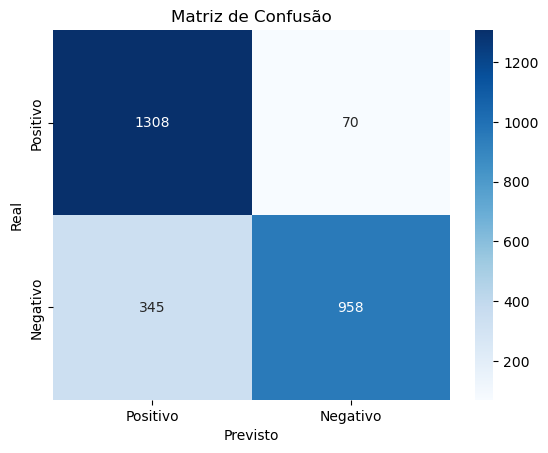

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_predict_Bernou)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Positivo", "Negativo"], yticklabels=["Positivo", "Negativo"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

### Comparação de resultados

In [43]:
print("Multinomial Accuracy:", accuracy_Multi)
print("Gaussian Accuracy:", accuracy_Gauss)
print("Complement Accuracy:", accuracy_Complem)
print("Bernoulli Accuracy:", accuracy_Bernou)

Multinomial Accuracy: 0.8008205893323387
Gaussian Accuracy: 0.9261469600895188
Complement Accuracy: 0.8049235359940321
Bernoulli Accuracy: 0.84520701230884


## Breast Cancer Wisconsin (Diagnostic) Dataset

### Download do Dataset

In [23]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\SBUtilizador\.cache\kagglehub\datasets\uciml\breast-cancer-wisconsin-data\versions\2


### Importar Dataset

In [1]:
df_bcw = pd.read_csv('breast-cancer-wisconsin-data/data.csv')#, sep=',', header=None, names=["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave"])

NameError: name 'pd' is not defined

### Verificar se não existe valores nulos

In [45]:
df_bcw.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### Perceber quantidade diferente de dados presente em cada coluna

In [46]:
df_bcw.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

### Dimensão do Dataset

In [47]:
df_bcw.shape

(569, 33)

### Visulaizar 5 primeiras linhas do Dataset

In [48]:
df_bcw.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Eliminar coluna "id" e "Unnamed: 32" do Dataset

In [49]:
df_bcw.drop(columns=['id', 'Unnamed: 32'], axis=1, inplace=True)
df_bcw.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Alterar valor de Y de M e B para 0 e 1 respetivamente

In [51]:
df_bcw['diagnosis'].replace(['M', 'B'], [0, 1], inplace=True)
df_bcw.head()

C:\Users\SBUtilizador\AppData\Local\Temp\ipykernel_12332\2577212.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bcw['diagnosis'].replace(['M', 'B'], [0, 1], inplace=True)
C:\Users\SBUtilizador\AppData\Local\Temp\ipykernel_12332\2577212.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_b

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Visualizar Informações do Dataset

In [52]:
df_bcw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [53]:
df_bcw.nunique()

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

### Visualizar Dados Estatísticos do Dataset

In [54]:
df_bcw.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Separar Dataset em X e Y

In [55]:
x_bcw = df_bcw.iloc[:, 1:]
y_bcw = df_bcw["diagnosis"]
print(x_bcw.shape, y_bcw.shape)

(569, 30) (569,)


In [56]:
print(x_bcw.head())
print(y_bcw.tail())

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           

### Treinar o dataset com o modelo Gaussian Naive Bayes, fazer previsões e calcular $R^2$

In [57]:
from sklearn.model_selection import train_test_split

x_train_bcw, x_test_bcw, y_train_bcw, y_test_bcw = train_test_split(x_bcw, y_bcw, test_size=0.33, random_state=42)

### Treinar Dataset, fazer previsões e calcular $R^2$ utilizado os vários modelos de Naive Bayes

#### MultinomialNB

In [63]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

multinomial_bcw = MultinomialNB()
multinomial_bcw.fit(x_train_bcw, y_train_bcw)

y_predict_bcw_multi = multinomial_bcw.predict(x_test_bcw)

#### Accuracy

In [65]:
acc_multi = accuracy_score(y_test_bcw, y_predict_bcw_multi)
print("Accuracy:", acc_multi)

Accuracy: 0.9202127659574468


#### Matriz Confusão

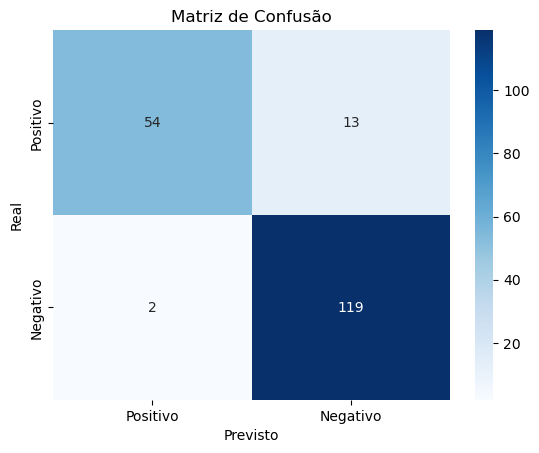

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test_bcw, y_predict_bcw_multi)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Positivo", "Negativo"], yticklabels=["Positivo", "Negativo"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

#### GaussianNB

In [68]:
from sklearn.naive_bayes import GaussianNB

gaussian_bcw = GaussianNB()
gaussian_bcw.fit(x_train_bcw, y_train_bcw)
y_predict_bcw_gauss = gaussian_bcw.predict(x_test_bcw)

#### Accuracy

In [69]:
acc_gauss = accuracy_score(y_test_bcw, y_predict_bcw_gauss)
print("Accuracy:", acc_gauss)

Accuracy: 0.9414893617021277


#### Matriz Confusão

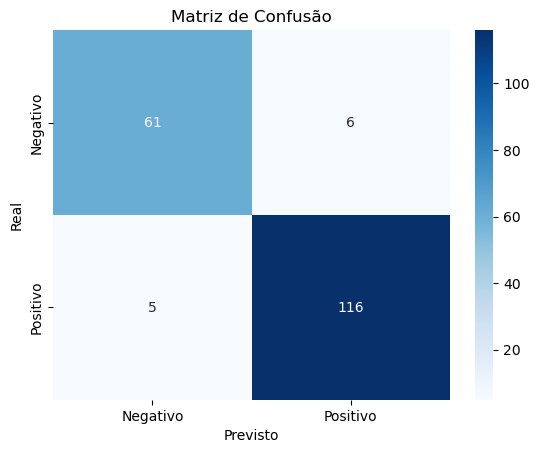

In [76]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test_bcw, y_predict_bcw_gauss)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

#### ComplementNB

In [80]:
from sklearn.naive_bayes import ComplementNB

complement_bcw = ComplementNB()
complement_bcw.fit(x_train_bcw, y_train_bcw)

y_predict_bcw_comple = complement_bcw.predict(x_test_bcw)

#### Accuracy

In [81]:
acc_comple = accuracy_score(y_test_bcw, y_predict_bcw_comple)
print("Accuracy:", acc_comple)

Accuracy: 0.9148936170212766


#### Matriz Confusão

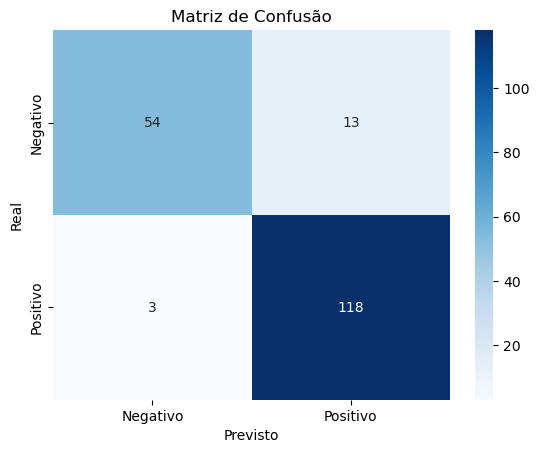

In [82]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test_bcw, y_predict_bcw_comple)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

#### BernoulliNB

In [90]:
from sklearn.naive_bayes import BernoulliNB

bernoulli_bcw = BernoulliNB()
bernoulli_bcw.fit(x_train_bcw, y_train_bcw)

y_predict_bcw_bernou = bernoulli_bcw.predict(x_test_bcw)

#### Accuracy

In [91]:
acc_bernou = accuracy_score(y_test_bcw, y_predict_bcw_bernou)
print("Accuracy:", acc_bernou)

Accuracy: 0.6436170212765957


#### Matriz Confusão

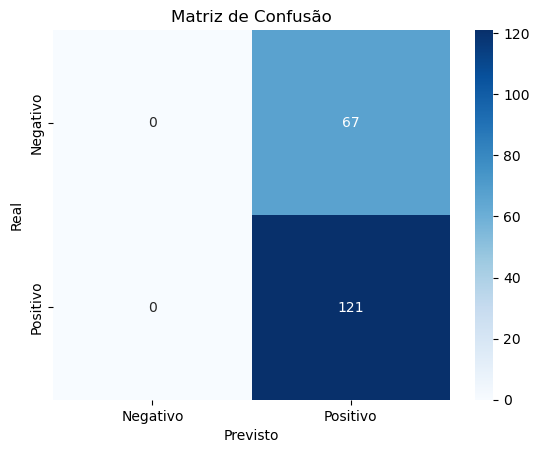

In [92]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test_bcw, y_predict_bcw_bernou)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

### Visualização dos Scores

In [93]:
print("Multinomial Accuracy:", acc_multi)
print("Gaussian Accuracy:", acc_gauss)
print("Complement Accuracy:", acc_comple)
print("Bernoulli Accuracy:", acc_bernou)

Multinomial Accuracy: 0.6436170212765957
Gaussian Accuracy: 0.9414893617021277
Complement Accuracy: 0.9148936170212766
Bernoulli Accuracy: 0.6436170212765957


In [22]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("emineyetm/fake-news-detection-datasets")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 41.0M/41.0M [00:07<00:00, 5.58MB/s]

Extracting files...


Path to dataset files: C:\Users\SBUtilizador\.cache\kagglehub\datasets\emineyetm\fake-news-detection-datasets\versions\1


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

### Importar Dataset de Fake News e True News

In [ ]:
dataset_fake = pd.read_csv('FakeNews _dataset/Fake.csv', sep=',', header=None, names=['title','text','subject','date'])
dataset_true = pd.read_csv('FakeNews _dataset/True.csv', sep=',', header=None, names=['title','text','subject','date'])

### Eliminar coluna Subject e Date e 1ª linha

In [ ]:
dataset_text_fake = pd.DataFrame({'Texto':dataset_fake.iloc[1:, 1]})
dataset_text_true = pd.DataFrame({'Texto':dataset_true.iloc[1:, 1]})

### Vizualizar dados

In [145]:
dataset_text_fake.head()

,Texto,Fake or Not Fake News
1,Donald Trump jus...,0
2,House Intelligen...,0
3,"On Friday, it wa...",0
4,On Christmas day...,0
5,Pope Francis use...,0


### Acrescentar coluna de 0's ao Fake Dataset e 1's ao True Dataset

In [146]:
dataset_text_fake["Fake or Not Fake News"] = 0
dataset_text_true["Fake or Not Fake News"] = 1

### Vizualizar dados

In [149]:
print("Dimensao:", dataset_text_fake.shape)
pd.set_option('display.max_colwidth', 50)  # ou um valor grande, como 1000

dataset_text_fake.head()

Dimensao: (23481, 2)


,Texto,Fake or Not Fake News
1,Donald Trump just couldn t wish all Americans ...,0
2,House Intelligence Committee Chairman Devin Nu...,0
3,"On Friday, it was revealed that former Milwauk...",0
4,"On Christmas day, Donald Trump announced that ...",0
5,Pope Francis used his annual Christmas Day mes...,0


In [150]:
print("Dimensao:", dataset_text_true.shape)
dataset_text_true.head()

Dimensao: (21417, 2)


,Texto,Fake or Not Fake News
1,WASHINGTON (Reuters) - The head of a conservat...,1
2,WASHINGTON (Reuters) - Transgender people will...,1
3,WASHINGTON (Reuters) - The special counsel inv...,1
4,WASHINGTON (Reuters) - Trump campaign adviser ...,1
5,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


### Unir Datasets

In [151]:
# Concatenar os DataFrames verticalmente
dataset_news = pd.concat([dataset_text_fake, dataset_text_true])
print("Dimensao:", dataset_news.shape)
print(dataset_news.head())
print(dataset_news.tail())

Dimensao: (44898, 2)
                                               Texto  Fake or Not Fake News
1  Donald Trump just couldn t wish all Americans ...                      0
2  House Intelligence Committee Chairman Devin Nu...                      0
3  On Friday, it was revealed that former Milwauk...                      0
4  On Christmas day, Donald Trump announced that ...                      0
5  Pope Francis used his annual Christmas Day mes...                      0
                                                   Texto  \
21413  BRUSSELS (Reuters) - NATO allies on Tuesday we...   
21414  LONDON (Reuters) - LexisNexis, a provider of l...   
21415  MINSK (Reuters) - In the shadow of disused Sov...   
21416  MOSCOW (Reuters) - Vatican Secretary of State ...   
21417  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...   

       Fake or Not Fake News  
21413                      1  
21414                      1  
21415                      1  
21416                      1  
21417  

### Separar X do Y

In [152]:
x_news = pd.DataFrame(dataset_news.iloc[:, 0])
y_news = pd.DataFrame(dataset_news.iloc[:, 1])
print("X:", x_news.shape, "Y:", y_news.shape)

X: (44898, 1) Y: (44898, 1)


In [153]:
x_news.head()

,Texto
1,Donald Trump just couldn t wish all Americans ...
2,House Intelligence Committee Chairman Devin Nu...
3,"On Friday, it was revealed that former Milwauk..."
4,"On Christmas day, Donald Trump announced that ..."
5,Pope Francis used his annual Christmas Day mes...


### Colocar texto em minusculas

In [154]:
x_news["Texto"] = x_news["Texto"].str.lower()
x_news.head()

,Texto
1,donald trump just couldn t wish all americans ...
2,house intelligence committee chairman devin nu...
3,"on friday, it was revealed that former milwauk..."
4,"on christmas day, donald trump announced that ..."
5,pope francis used his annual christmas day mes...


In [157]:
df = x_news.copy()
df = df.iloc[:50]
df.head()

,Texto
1,donald trump just couldn t wish all americans ...
2,house intelligence committee chairman devin nu...
3,"on friday, it was revealed that former milwauk..."
4,"on christmas day, donald trump announced that ..."
5,pope francis used his annual christmas day mes...


### Eliminar determinantes, pronomes e preposições 

In [70]:
import spacy

# Carregar o modelo de inglês
nlp = spacy.load("en_core_web_sm")

# Frase de exemplo
text = "John went to the store with Martin"

# Processar o texto com spaCy
doc = nlp(text)

# Classes gramaticais que queremos remover: determiners, pronouns, adpositions (prepositions), etc.
remove_pos = ["DET", "PRON", "ADP"]

# Filtrar as palavras
filtered_words = [token.x_news for token in doc if token.pos_ not in remove_pos]

# Resultado
print(filtered_words)

AttributeError: 'spacy.tokens.token.Token' object has no attribute 'x_news'

#### Conclui-se que Gaussian Naive Bayes foi o modelo que obteve melhor accuracy em ambos os datasets, mesmo este sendo ideal para dados continuos 